In [1]:
import os
os.listdir()


['.config', 'train.csv', 'sample_data']

Verify File Upload

Pandas library for table show


In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


count row and coloum


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Statistical Summary

In [4]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Values Check

In [5]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


According to observation
The dataset contains missing values, especially in the Age and Cabin columns.
Cabin has too many missing values, so it will be removed.
Age will be filled using the median value to avoid data loss.

Data Cleaning – Cabin Column Drop


df.drop(columns=["Cabin"], inplace=True)


In [10]:
##Age Missing Values Fill
df["Age"] = df["Age"].fillna(df["Age"].median())


In [11]:
# Embarked Missing Values Fill

df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


/tmp/ipython-input-2061810419.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [12]:
# Confirm Cleaning
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Data Cleaning Confirmation
All missing values in the dataset have been successfully handled.
The dataset is now complete, clean, and ready for exploratory data analysis and visualization.


DATA VISUALIZATION


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


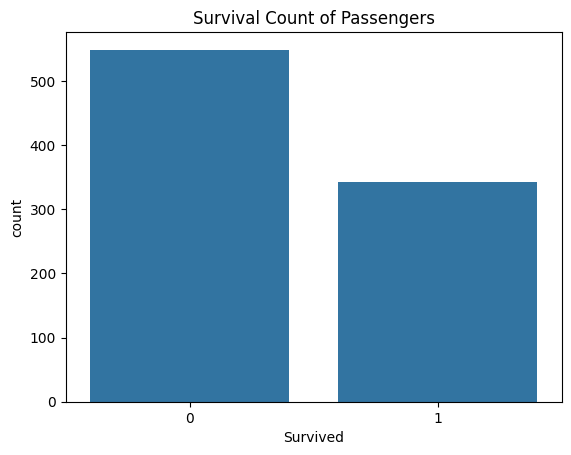

In [14]:
# Survival Count Plot
sns.countplot(x="Survived", data=df)
plt.title("Survival Count of Passengers")
plt.show()


### Insight
The number of passengers who did not survive is higher than those who survived.
This shows that survival on the Titanic was difficult for a majority of passengers.


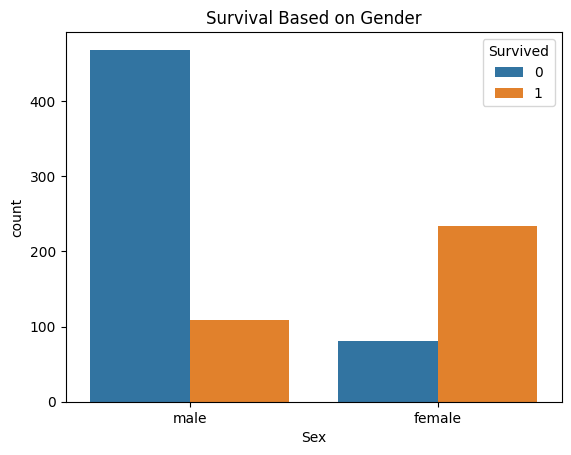

In [15]:
# Gender vs Survival
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Based on Gender")
plt.show()


### Survival Based on Gender
The visualization clearly shows that female passengers had a much higher survival rate compared to male passengers.
This indicates that gender was a major factor influencing survival during the Titanic disaster.


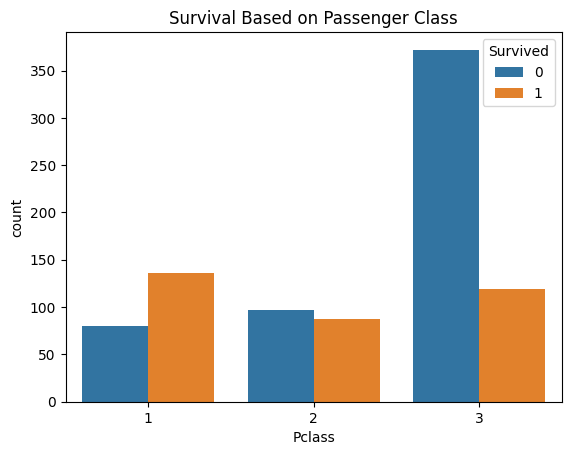

In [16]:
# Passenger Class vs Survival
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival Based on Passenger Class")
plt.show()


### Survival Based on Passenger Class
The graph shows that passengers traveling in first class had the highest survival rate.
Survival chances decreased significantly for passengers in second and third class, indicating that passenger class strongly influenced survival.


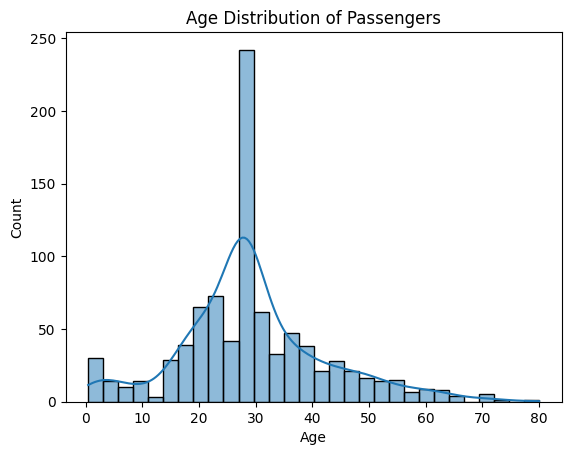

In [17]:
# Age Distribution
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### Age Distribution
Most passengers were between 20 and 40 years old.
The age distribution is slightly right-skewed, showing fewer older passengers on board.


 ### Summary


In this exploratory data analysis, the Titanic dataset was analyzed to understand patterns related to passenger survival.
Data cleaning was performed by handling missing values in the Age and Embarked columns and removing the Cabin column due to excessive missing data.

The analysis revealed that gender and passenger class were major factors influencing survival.
Female passengers and those traveling in first class had significantly higher survival rates.
Age distribution showed that most passengers were young to middle-aged adults.

Overall, the visualizations provided clear insights into how socio-economic and demographic factors affected survival on the Titanic.
